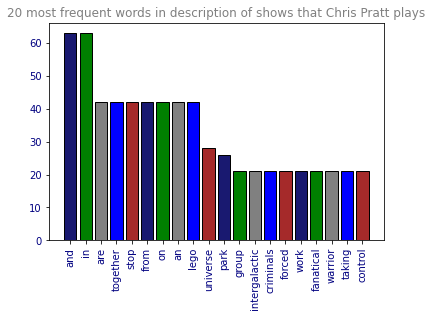

In [100]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
def analyze_movie(input_file, actor_name, stopwords):
    new_list = {word.lower() for word in stopwords}
    # creating a data frame
    df = pd.read_csv(input_file)
    # update the data frame with the info of movies that this actor is playing
    df=df.loc[df['Actors'].str.contains( actor_name)]
    # all description together
    descol = df['Description'].tolist()

    lowerStopWords= set()

    #lets make the given set of stopwords lowercase
    for sw in stopwords:
        lowerStopWords.add(sw.lower())
    wordsfreq =[]
    specialchar=["@" ,"!" , "#","$" , "%" , "^" , "&" , "*" ,",", "(" , "<" , ">" , "/" , "}" ,".", "{", "<" , "{" , "/" , "}" , "|" ] 
    for j in range(0 , len(descol)-1):
        for i in descol[j].split():
            if i.lower() not in lowerStopWords :
                for k in specialchar:
                    i = i.replace(k," ")        
                    wordsfreq.append(i.lower().strip())
    mostfreqwords = Counter(wordsfreq).most_common(20) #most freq words is a list with tuples!
    #creating bar-chart
    x=[]
    y=[]
    for i in mostfreqwords:
        x.append(i[0])
        y.append(i[1])
    plt.bar(x, height =  y, width =0.8 ,color=[ 'midnightblue','green','grey', 'blue', 'brown'], edgecolor="black")
    plt.title('20 most frequent words in description of shows that '+ actor_name +" plays" , color='grey')
    plt.xticks(rotation=90, color='navy')
    plt.yticks(color='navy')
    plt.show()


analyze_movie("IMDB-Movie-Data.csv", "Chris Pratt", set(["2001",'a', "To", "the", "OF"]))